In [33]:
#There isnt enough data
import numpy as np
import pandas as pd

stand_test = pd.read_csv(r"C:\Users\djbro\OneDrive\Desktop\Multiple Linear Regression\Testing\pisa2009test.csv")
stand_test1= pd.read_csv(r"C:\Users\djbro\OneDrive\Desktop\Multiple Linear Regression\Testing\pisa2009train.csv")


In [34]:
#Concatenate wine and wine1
a=[stand_test,stand_test1]
dataset = pd.concat(a)
dataset


,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,9,1,White,0.0,1.0,1.0,NaN,0.0,1.0,1.0,...,1.0,1.0,0.0,250.0,20.0,1.0,1,0,421.0,509.99
3659,9,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,450.0,16.0,1.0,1,0,1317.0,444.90
3660,10,1,Hispanic,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,225.0,16.0,1.0,1,1,539.0,476.89
3661,11,1,Black,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,1.0,1.0,0.0,54.0,36.0,1.0,1,1,NaN,363.61


In [35]:
#Checking for missing values
dataset.isnull().sum()

grade                      0
male                       0
raceeth                   48
preschool                 77
expectBachelors           85
motherHS                 142
motherBachelors          585
motherWork               129
fatherHS                 370
fatherBachelors          857
fatherWork               346
selfBornUS                93
motherBornUS              94
fatherBornUS             171
englishAtHome             98
computerForSchoolwork     95
read30MinsADay            55
minutesPerWeekEnglish    289
studentsInEnglish        363
schoolHasLibrary         201
publicSchool               0
urban                      0
schoolSize               231
readingScore               0
dtype: int64

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5233 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  5233 non-null   int64  
 1   male                   5233 non-null   int64  
 2   raceeth                5185 non-null   object 
 3   preschool              5156 non-null   float64
 4   expectBachelors        5148 non-null   float64
 5   motherHS               5091 non-null   float64
 6   motherBachelors        4648 non-null   float64
 7   motherWork             5104 non-null   float64
 8   fatherHS               4863 non-null   float64
 9   fatherBachelors        4376 non-null   float64
 10  fatherWork             4887 non-null   float64
 11  selfBornUS             5140 non-null   float64
 12  motherBornUS           5139 non-null   float64
 13  fatherBornUS           5062 non-null   float64
 14  englishAtHome          5135 non-null   float64
 15  comp

In [37]:
dataset = dataset.dropna()

In [38]:
#Checking for missing values
dataset.isnull().sum()

grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

In [39]:
#Import label encoder
from sklearn import preprocessing
  
#label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
  
#Encode labels in column Sex and Embarked
dataset['raceeth']= label_encoder.fit_transform(dataset['raceeth'])

C:\Users\djbro\AppData\Local\Temp\ipykernel_14736\2164675448.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['raceeth']= label_encoder.fit_transform(dataset['raceeth'])


In [40]:
# Checking for null values
print(dataset.info())

# Checking for outliers
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3404 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3404 non-null   int64  
 1   male                   3404 non-null   int64  
 2   raceeth                3404 non-null   int32  
 3   preschool              3404 non-null   float64
 4   expectBachelors        3404 non-null   float64
 5   motherHS               3404 non-null   float64
 6   motherBachelors        3404 non-null   float64
 7   motherWork             3404 non-null   float64
 8   fatherHS               3404 non-null   float64
 9   fatherBachelors        3404 non-null   float64
 10  fatherWork             3404 non-null   float64
 11  selfBornUS             3404 non-null   float64
 12  motherBornUS           3404 non-null   float64
 13  fatherBornUS           3404 non-null   float64
 14  englishAtHome          3404 non-null   float64
 15  comp

In [41]:
dataset.raceeth.unique()

array([6, 0, 3, 2, 4, 1, 5])

In [42]:
dataset.head(5)

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,6,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
4,10,0,6,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50
6,10,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,240.0,30.0,1.0,1,0,808.0,405.13
7,10,0,6,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,270.0,35.0,1.0,1,0,808.0,665.05
8,11,0,6,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,270.0,30.0,1.0,1,0,808.0,604.84


In [43]:
dataset.columns

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore'],
      dtype='object')

In [44]:
dataset.corr()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
grade,1.000000,-0.088510,-0.023883,0.008111,0.115848,0.015706,0.035358,0.032151,0.055522,0.057963,...,-0.009784,0.083564,0.041193,0.038795,0.054908,-0.026137,-0.048588,0.080475,0.068044,0.222190
male,-0.088510,1.000000,0.020437,0.012026,-0.092327,0.030829,0.052541,-0.015031,0.028285,0.058505,...,-0.006462,-0.017935,-0.200024,-0.004372,-0.036653,0.032066,-0.088922,0.025459,-0.003000,-0.120640
raceeth,-0.023883,0.020437,1.000000,0.058449,0.033880,0.227232,0.159000,0.069507,0.229714,0.170622,...,0.390556,0.086566,-0.008331,0.017388,-0.070715,-0.011168,-0.048847,-0.285179,-0.197085,0.247034
preschool,0.008111,0.012026,0.058449,1.000000,0.103052,0.138550,0.167373,0.083065,0.134133,0.161456,...,0.119919,0.116375,-0.013158,-0.019020,-0.030417,0.006801,-0.100144,-0.015045,-0.012268,0.075072
expectBachelors,0.115848,-0.092327,0.033880,0.103052,1.000000,0.119481,0.177169,0.071965,0.160543,0.220153,...,0.051012,0.153392,0.113816,0.012247,0.032652,0.032860,-0.109911,0.024974,0.038534,0.343326
motherHS,0.015706,0.030829,0.227232,0.138550,0.119481,1.000000,0.243386,0.160225,0.511132,0.229800,...,0.403534,0.162692,0.011817,0.009788,-0.044187,0.008879,-0.076067,-0.108504,-0.081655,0.152614
motherBachelors,0.035358,0.052541,0.159000,0.167373,0.177169,0.243386,1.000000,0.132301,0.202969,0.550203,...,0.158373,0.137949,0.029851,0.015066,-0.041785,-0.005408,-0.186335,-0.023489,-0.003737,0.228640
motherWork,0.032151,-0.015031,0.069507,0.083065,0.071965,0.160225,0.132301,1.000000,0.121747,0.052286,...,0.136922,0.084386,-0.032170,0.023477,-0.018142,-0.010506,-0.027963,-0.022201,-0.054051,0.039399
fatherHS,0.055522,0.028285,0.229714,0.134133,0.160543,0.511132,0.202969,0.121747,1.000000,0.272391,...,0.361234,0.165056,0.038868,0.020090,-0.023668,0.016795,-0.083902,-0.097754,-0.080720,0.195039
fatherBachelors,0.057963,0.058505,0.170622,0.161456,0.220153,0.229800,0.550203,0.052286,0.272391,1.000000,...,0.130482,0.160024,0.048371,0.005093,-0.033205,-0.003147,-0.191952,-0.009231,0.020604,0.278953


In [45]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 0)

In [46]:
#Re-scaling the Features
#We can see that all the columns have 
#smaller integer values in the dataset 
#except the area column. So it is important to
#re-scale the variables so that they all have a comparable scale. 
#If we don’t have relative scales, then some of the regression model 
#coefficients will be of different units compared to the other coefficients.

#To do that, we use the MinMax scaling method.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['minutesPerWeekEnglish', 'studentsInEnglish', 'schoolSize', 'readingScore','grade','raceeth']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
1938,0.50,1,0.333333,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.053571,0.256757,1.0,1,0,0.195177,0.443188
611,0.25,0,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.238095,0.337838,1.0,1,0,0.195177,0.206674
48,0.50,0,0.166667,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.148810,0.310811,1.0,1,1,0.288747,0.602054
1169,0.50,1,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.148810,0.297297,1.0,1,0,0.100394,0.418218
745,0.50,1,1.000000,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.133929,0.189189,1.0,1,0,0.040340,0.400060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,0.75,0,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.208333,0.121622,1.0,1,0,0.181225,0.413140
3439,0.25,1,0.500000,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.178571,0.391892,1.0,1,0,0.189111,0.427145
1017,0.50,0,0.500000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.207143,0.337838,1.0,1,1,0.143464,0.723057
2450,0.50,1,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.095238,0.256757,1.0,0,1,0.168638,0.587841


In [48]:
# Dividing the training data set into X and Y
y_train = df_train.pop('readingScore')
X_train = df_train

In [49]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           readingScore   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     41.94
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          9.41e-157
Time:                        13:49:20   Log-Likelihood:                 1276.6
No. Observations:                2382   AIC:                            -2505.
Df Residuals:                    2358   BIC:                            -2367.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1484      0.032      4.575      0.000       0.085       0.212
grade                     0.2120      0.023      9.146      0.000       0.167       0.257
male                     -0.0206      0.006     -3.416      0.001      -0.032      -0.009
raceeth                   0.1335      0.012     10.883      0.000       0.109       0.158
preschool                -0.0009      0.007     -0.136      0.892      -0.014       0.012
expectBachelors           0.0954      0.008     11.520      0.000       0.079       0.112
motherHS                  0.0103      0.012      0.873      0.383      -0.013       0.034
motherBachelors           0.0213      0.008      2.820      0.005       0.006       0.036
motherWork                0.0009      0.007      0.126      0.900      -0.013       0.014
fatherHS                  0.0213      0.011      1.998      0.046       0.000       0.042
fatherBachelors           0.0427      0.008      5.519      0.000       0.028       0.058
fatherWork                0.0044      0.008      0.517      0.605      -0.012       0.021
selfBornUS               -0.0001      0.013     -0.008      0.994      -0.026       0.026
motherBornUS             -0.0328      0.013     -2.595      0.010      -0.058      -0.008
fatherBornUS              0.0110      0.012      0.903      0.366      -0.013       0.035
englishAtHome             0.0076      0.013      0.580      0.562      -0.018       0.033
computerForSchoolwork     0.0353      0.011      3.198      0.001       0.014       0.057
read30MinsADay            0.0643      0.007      9.781      0.000       0.051       0.077
minutesPerWeekEnglish     0.0443      0.036      1.229      0.219      -0.026       0.115
studentsInEnglish        -0.0050      0.034     -0.148      0.882      -0.072       0.062
schoolHasLibrary          0.0047      0.017      0.278      0.781      -0.028       0.038
publicSchool             -0.0369      0.013     -2.918      0.004      -0.062      -0.012
urban                 -2.712e-05      0.008     -0.003      0.997      -0.015       0.015
schoolSize                0.0787      0.028      2.802      0.005       0.024       0.134
==============================================================================
Omnibus:                        2.001   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.934
Skew:                          -0.067   Prob(JB):                        0.380
Kurtosis:                       3.041   Cond. No.                         47.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#Recursive Feature Elimination (RFE)
#RFE is an automatic process where we don’t need to select 
#variables manually. We follow the same steps we have done earlier 
#until Re-scaling the features and dividing the data into X and Y.

#We will use the LinearRegression function from sklearn 
#for RFE (which is a utility from sklearn)

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('grade', True, 1),
 ('male', False, 3),
 ('raceeth', True, 1),
 ('preschool', False, 11),
 ('expectBachelors', True, 1),
 ('motherHS', False, 6),
 ('motherBachelors', False, 2),
 ('motherWork', False, 12),
 ('fatherHS', True, 1),
 ('fatherBachelors', True, 1),
 ('fatherWork', False, 10),
 ('selfBornUS', False, 13),
 ('motherBornUS', False, 4),
 ('fatherBornUS', False, 5),
 ('englishAtHome', False, 7),
 ('computerForSchoolwork', True, 1),
 ('read30MinsADay', True, 1),
 ('minutesPerWeekEnglish', True, 1),
 ('studentsInEnglish', False, 8),
 ('schoolHasLibrary', False, 9),
 ('publicSchool', True, 1),
 ('urban', False, 14),
 ('schoolSize', True, 1)]

In [53]:
# Creating X_test dataframe with RFE selected variables
col = ['grade','raceeth','expectBachelors','motherBachelors','fatherHS','fatherBachelors','motherBornUS','computerForSchoolwork','read30MinsADay','publicSchool']
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     93.63
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          2.41e-163
Time:                        13:49:20   Log-Likelihood:                 1264.5
No. Observations:                2382   AIC:                            -2507.
Df Residuals:                    2371   BIC:                            -2444.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                 Features        VIF
0                   const  52.263214
1                   grade   1.027453
2                 raceeth   1.383522
3         expectBachelors   1.116988
4         motherBachelors   1.478825
5                fatherHS   1.260773
6         fatherBachelors   1.557503
7            motherBornUS   1.484564
8   computerForSchoolwork   1.071096
9          read30MinsADay   1.018813
10           publicSchool   1.060722


In [55]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     93.63
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          2.41e-163
Time:                        13:49:20   Log-Likelihood:                 1264.5
No. Observations:                2382   AIC:                            -2507.
Df Residuals:                    2371   BIC:                            -2444.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [56]:
#Since the p-values and VIF are in the desired range, we’ll move forward with the analysis.

In [57]:
#The next step is the residual analysis of error terms.

#Residual Analysis
#So, let’s check if the error terms are also normally distributed using a histogram.

<AxesSubplot:ylabel='Count'>

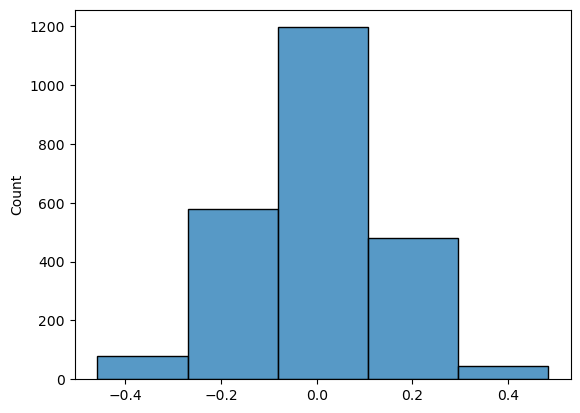

In [58]:
y_train_price = lm.predict(X_train_lm)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 5)

In [59]:
num_vars = ['minutesPerWeekEnglish', 'studentsInEnglish', 'schoolSize', 'readingScore','grade','raceeth']
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('readingScore')
X_test = df_test

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

In [60]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred)

0.2823514158060685

In [61]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.11335678625972335
0.020431053528085375
0.14293723632449795


In [62]:
#The R² value for the test data = 0.6481740917926483, 
#which is pretty similar to the train data.

#Since the R² values for both the train and 
#test data are almost equal, the model we built is the best-fitted model.